In [1]:
from PIL import Image
import numpy as np
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math
import cv2
import glob
from sklearn import metrics, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

# The 5 images, belonging to two different classes (tree, dog)


In [2]:
path='Database/Original/Dog'
path2='Database/Original/Tree'
data_dog=[]
data_tree=[]

path_o='Database\\ouput\\Dog'
path2_o='Database\\ouput\\Tree'
data_output=[]
label=[]

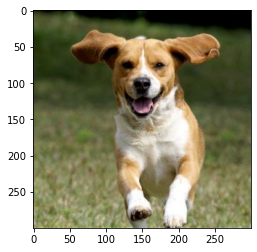

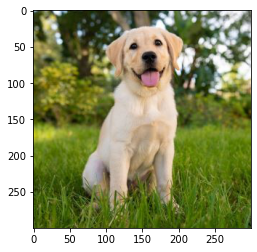

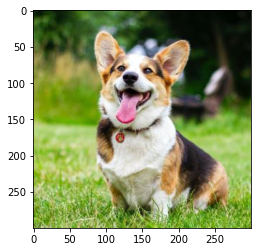

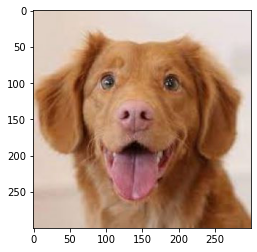

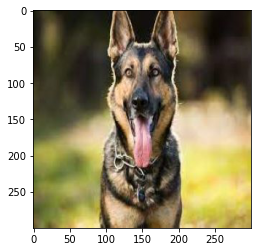

In [3]:
files = glob.glob (path+"/*.jpg")
for file in files:
    img=Image.open(file)
    image = np.array(img)
    data_dog.append(image) 
len(data_dog)
for i in range(len(data_dog)):
    plt.imshow(data_dog[i])
    plt.show()

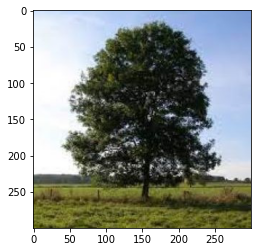

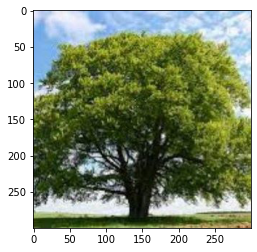

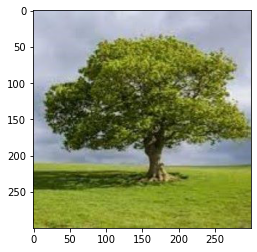

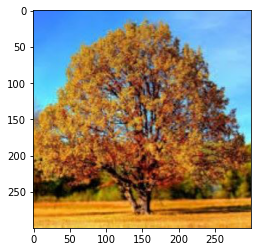

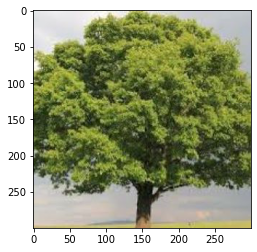

In [4]:
files = glob.glob (path2+"/*.jpg")
for file in files:
    img=Image.open(file)
    image = np.array(img)
    data_tree.append(image) 
for i in range(len(data_tree)):
    plt.imshow(data_tree[i])
    plt.show()

#  Image transformation methods



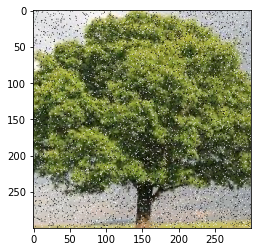

In [5]:
def salt_pepper_noise(img,prob):
    image = np.array(img)
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
plt.imshow(salt_pepper_noise(img,0.05))
plt.show()

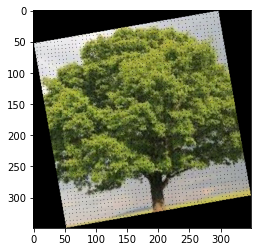

In [6]:
def rotate(img,angle):
    image = np.array(img)           # Load the image

    # Define the most occuring variables
    angle=math.radians(angle)                               #converting degrees to radians
    cosine=math.cos(angle)
    sine=math.sin(angle)
    height=image.shape[0]                                   #define the height of the image
    width=image.shape[1]                                    #define the width of the image

# Define the height and width of the new image that is to be formed
    new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
    new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1

# define another image variable of dimensions of new_height and new _column filled with zeros
    output=np.zeros((new_height,new_width,image.shape[2]))

# Find the centre of the image about which we have to rotate the image
    original_centre_height   = round(((image.shape[0]+1)/2)-1)    #with respect to the original image
    original_centre_width    = round(((image.shape[1]+1)/2)-1)    #with respect to the original image

# Find the centre of the new image that will be obtained
    new_centre_height= round(((new_height+1)/2)-1)        #with respect to the new image
    new_centre_width= round(((new_width+1)/2)-1)          #with respect to the new image

    for i in range(height):
        for j in range(width):
        #co-ordinates of pixel with respect to the centre of original image
            y=image.shape[0]-1-i-original_centre_height                   
            x=image.shape[1]-1-j-original_centre_width                      

        #co-ordinate of pixel with respect to the rotated image
            new_y=round(-x*sine+y*cosine)
            new_x=round(x*cosine+y*sine)

        #since image will be rotated the centre will change too, 
        #so to adust to that we will need to change new_x and new_y with respect to the new centre
            new_y=new_centre_height-new_y
            new_x=new_centre_width-new_x

        # adding if check to prevent any errors in the processing
            if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
                output[new_y,new_x,:]=image[i,j,:]                          #writing the pixels to the new destination in the output image

    pil_img=Image.fromarray((output).astype(np.uint8))                       # converting array to image
    return pil_img

plt.imshow(rotate(img,10))
#pil_img.save("rotated_image.png")   
plt.show()

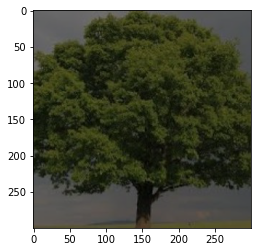

In [7]:
# lowing lumination
def lowing_lum(img):
    
    img10 = np.array(img)
    img10[:, :, (1, 2)] = img10[:, :, (1, 2)]/1.5
    img10[:, :, (0, 2)] = img10[:, :, (0, 2)]/1.5
    img10[:, :, (0, 1)] = img10[:, :, (0, 1)]/1.5
    return img10
plt.imshow(lowing_lum(img))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


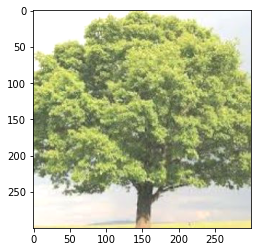

In [8]:
def change_brightness(img, value):
    image=np.array(img)
    image = image.astype("int16")
    try:
        image = image + value
    except: 
        image = image
    return image 
plt.imshow(change_brightness(img,50), vmin=0, vmax=255)
plt.show()

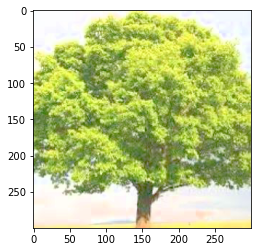

In [9]:
# Hue Saturation Value

def increase_brightness(img, value=30):
    img2 = np.array(img)
    hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img2 = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img2


def increase_saturation(img, value=30):
    img2 = np.array(img)
    hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    s[s > lim] = 255
    s[s <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img2 = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img2


def change_hue(img, value=30):
    img2 = np.array(img)
    hsv = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    h[h > lim] = 255
    h[h <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img2 = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img2
img8=increase_brightness(img,74)
plt.imshow(img8)
plt.show()

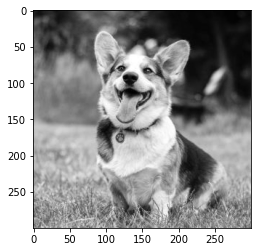

In [12]:
def to_gray_scale(img):
    img2 = np.array(img)
    rgb_weights = [0.2989, 0.5870, 0.1140]
    grayscale_image = np.dot(img2[...,:3], rgb_weights)
    return grayscale_image

plt.imshow(to_gray_scale(data_dog[2]), cmap=plt.get_cmap("gray"))
plt.show()

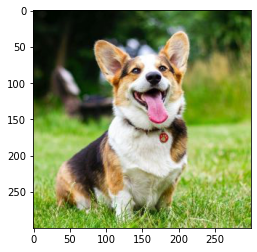

In [13]:
#flip selon y
def flip_y(img):
    img2 = np.array(img)
    return img2[:, ::-1, ]

plt.imshow(flip_y(data_dog[2]))
plt.show()

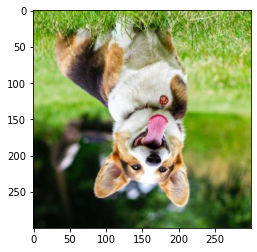

In [26]:
#flip selon x
def flip_x(img):
    img2 = np.array(img)
    return img2[::-1 ]

plt.imshow(flip_y(flip_x(data_dog[2])))
plt.show()

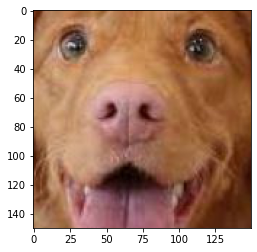

In [14]:
def crop_center(img2,cropx,cropy):
    img = np.array(img2)
    x = img.shape[0]
    y = img.shape[1]
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]
img=data_dog[3]
plt.imshow(crop_center(img,img.shape[0]//2,img.shape[1]//2))
plt.show()

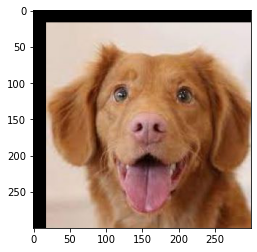

In [15]:
def translate(img,shift_x,shift_y):
    src_img = np.array(img)
    h,w = src_img.shape[:2]
    
    #translation matrix
    ts_mat = np.array([[1,0,shift_x],[0,1,shift_y]])
    
    out_img = np.zeros(src_img.shape,dtype='u1')
    
    for i in range(h):
        for j in range(w):
            origin_x = j
            origin_y = i
            origin_xy = np.array([origin_x,origin_y,1])
            
            new_xy = np.dot(ts_mat,origin_xy)
            new_x = new_xy[0]
            new_y = new_xy[1]

            if 0<new_x < w and 0<new_y < h:
                out_img[new_y,new_x]  = src_img[i,j]
    return out_img
plt.imshow(translate(img,np.random.randint(70),np.random.randint(100)))
plt.show()

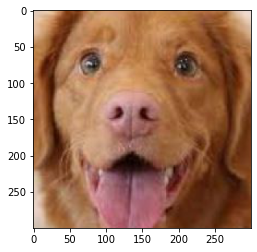

In [16]:
def zoom(img1,scale):
    img = np.array(img1)
    width=int(scale*img.shape[1])
    height=int(scale*img.shape[0])
    dimension=(width,height)
    resized=cv2.resize(img,dimension,interpolation=cv2.INTER_AREA)
    return crop_center(resized,img.shape[0],img.shape[1])

plt.imshow(zoom(img,1.5))

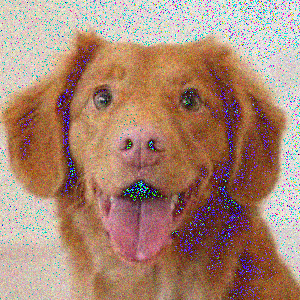

In [17]:
def add_noise(img1, prob=np.random.randint(10,30)):
    img = np.array(img1)
    x = np.random.normal(0, prob, img.shape)
    new_img = img + x
    return Image.fromarray((new_img).astype(np.uint8))


add_noise(img)

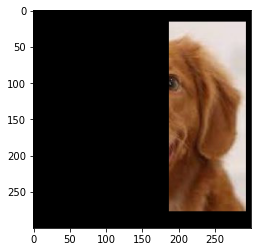

In [21]:
def crop(img1, top=np.random.randint(10), buttom=np.random.randint(250), right=np.random.randint(100), left=np.random.randint(50)):
    arr_bis = np.array(img1)
    arr= np.array(img1)
    x, y, z = arr_bis.shape
    for i in range(x):
        for j in range(y):
            if (i in range(0+left, x-right)) and (j in range(0+buttom, y-top)):
                arr_bis[i,j] = arr[i,j]
            else:
                arr_bis[i,j] = [0, 0, 0]    
    return Image.fromarray(arr_bis)

plt.imshow(crop(img))

# Visualize the histograms of original and some resulting images

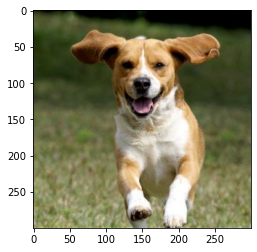

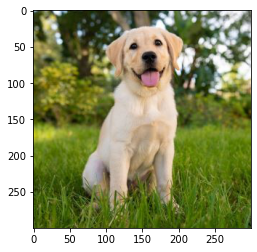

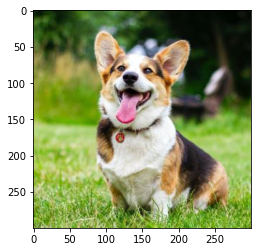

In [22]:
for i in range(3):
    plt.imshow(data_dog[i])
    plt.show()

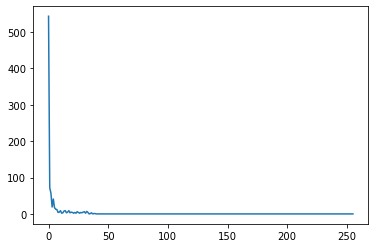

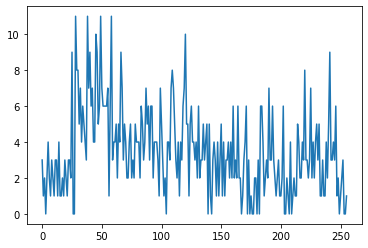

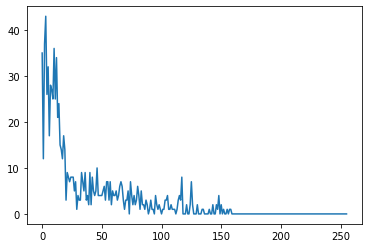

In [27]:
#Les Histogrammes de chaque photo de chaque chien
for i in range(3):
    histogram = cv2.calcHist(images=data_dog[i], channels=[0], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histogram)
    plt.show()


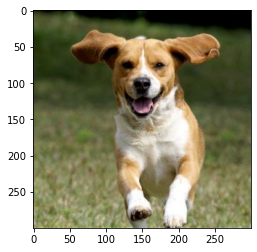

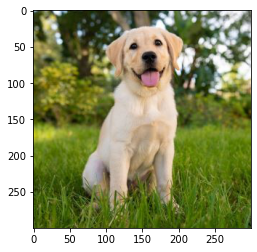

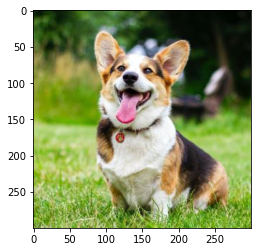

In [29]:
for i in range(3):
    img1=flip_y(flip_x(data_dog[i]))
    plt.imshow(data_dog[i])
    plt.show()

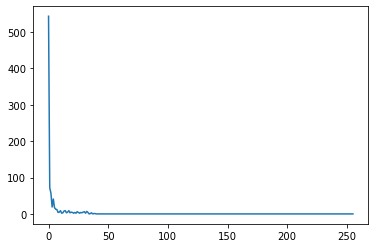

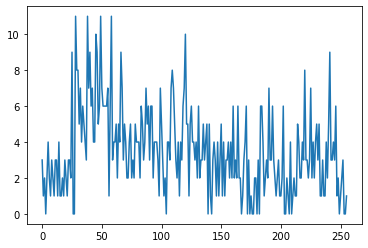

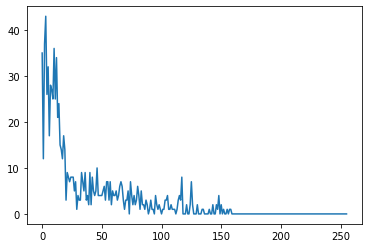

In [30]:
#Les Histogrammes de chaque chien apres la transformation flip
for i in range(3):
    img1=flip_y(flip_x(data_dog[i]))
    histogram = cv2.calcHist(images=data_dog[i], channels=[0], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histogram)
    plt.show()


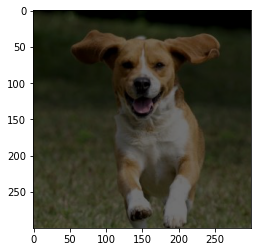

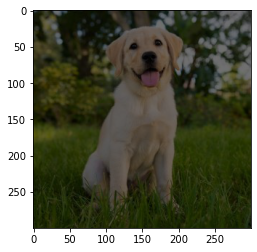

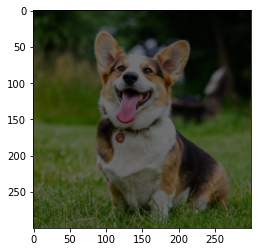

In [31]:
#Les photos de chaque chien apres la transformation lowing_lum
for i in range(3):
    img2=lowing_lum(data_dog[i])
    plt.imshow(img2)
    plt.show()

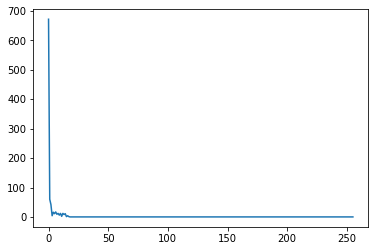

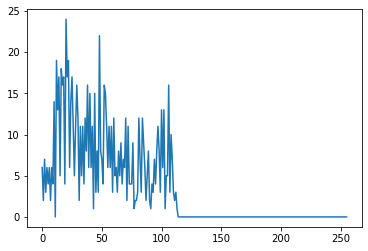

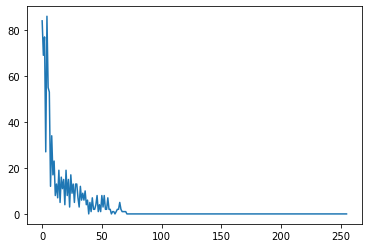

In [32]:
#Les Histogrammes de chaque chien apres la transformation lowing_lum
for i in range(3):
    img2=lowing_lum(data_dog[i])
    histogram = cv2.calcHist(images=img2, channels=[0], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histogram)
    plt.show()

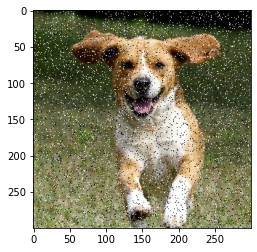

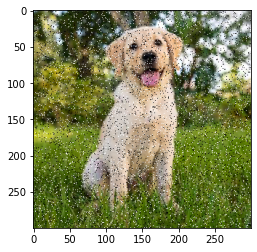

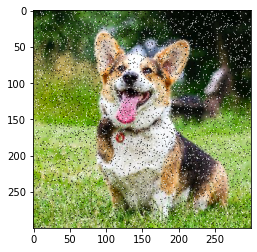

In [33]:
#Les photos de chaque chien apres la transformation salt_pepper_noise
for i in range(3):
    img3=salt_pepper_noise(data_dog[i],0.05)
    plt.imshow(img3)
    plt.show()

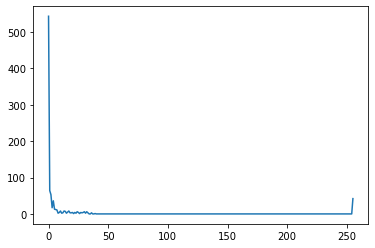

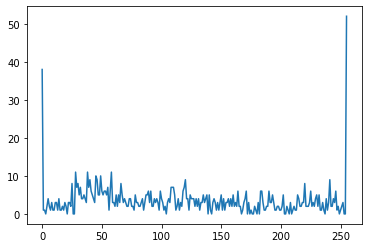

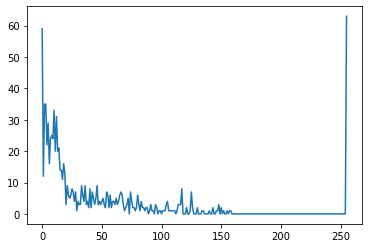

In [34]:
#Les Histogrammes de chaque chien apres la transformation salt_pepper_noise
for i in range(3):
    img3=salt_pepper_noise(data_dog[i],0.05)
    histogram = cv2.calcHist(images=img3, channels=[0], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histogram)
    plt.show()

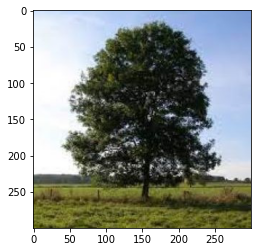

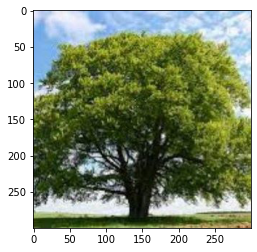

In [35]:
for i in range(2):
    plt.imshow(data_tree[i])
    plt.show()

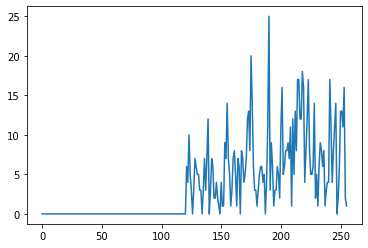

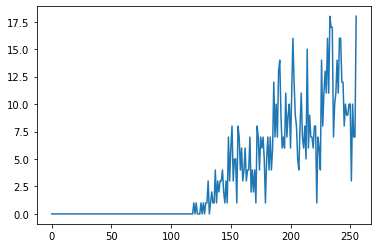

In [36]:
#Les Histogrammes de chaque photo de chaque arbre
for i in range(2):
    histogram = cv2.calcHist(images=data_tree[i], channels=[0], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histogram)
    plt.show()


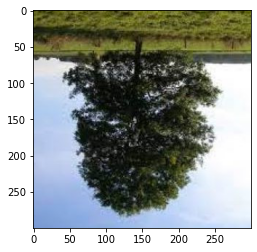

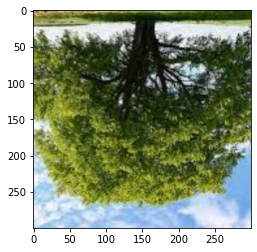

In [37]:
#Les images des arbres apres la transformation flip_y
for i in range(2):
    img1=flip_y(flip_x(data_tree[i]))
    plt.imshow(img1)
    plt.show()

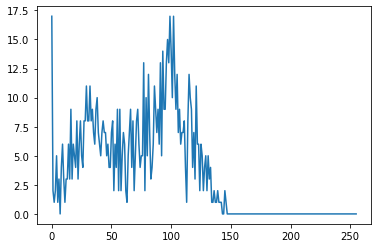

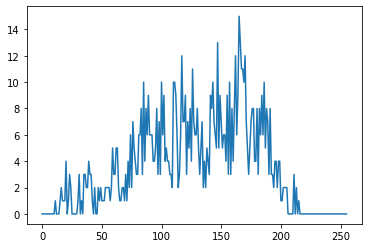

In [38]:
#Les images des arbres apres la transformation flip_y
for i in range(2):
    img1=flip_y(flip_x(data_tree[i]))
    histogram = cv2.calcHist(images=img1, channels=[0], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histogram)
    plt.show()

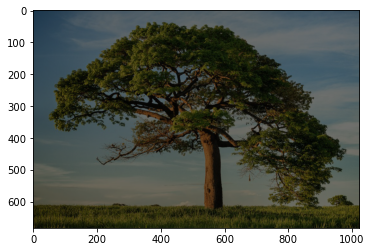

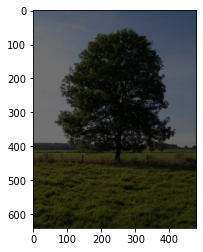

In [114]:
#Les photos de chaque arbres apres la transformation lowing_lum
for i in range(2):
    img2=lowing_lum(data_tree[i])
    plt.imshow(img2)
    plt.show()


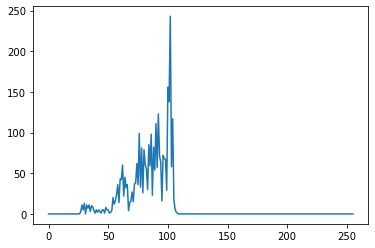

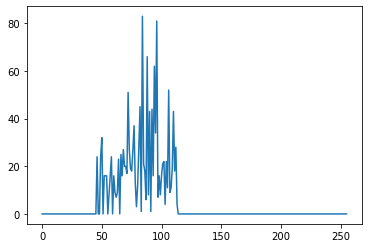

In [115]:
#Les Histogrammes de chaque arbre apres la transformation lowing_lum
for i in range(2):
    img2=lowing_lum(data_tree[i])
    histogram = cv2.calcHist(images=img2, channels=[0], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histogram)
    plt.show()

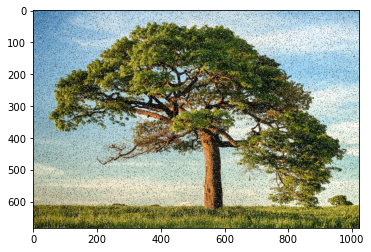

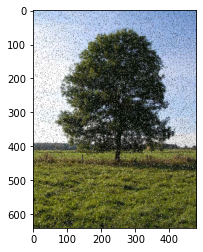

In [116]:
#Les photos de chaque arbre apres la transformation salt_pepper_noise
for i in range(2):
    img3=salt_pepper_noise(data_tree[i],0.05)
    plt.imshow(img3)
    plt.show()

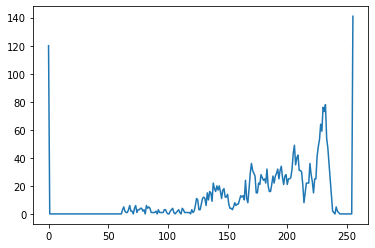

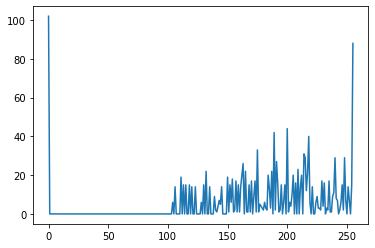

In [117]:
#Les Histogrammes  chaque tree apres la transformation salt_pepper_noise
for i in range(2):
    img3=salt_pepper_noise(data_tree[i],0.05)
    histogram = cv2.calcHist(images=img3, channels=[0], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(histogram)
    plt.show()

# Apply Data Augmentation

In [39]:
#Data augmentation dog
for i in range(len(data_dog)):
    img=Image.fromarray(data_dog[i])
    
    flipped_x=Image.fromarray(flip_x(img))
    flipped_x.save(path_o+"\\img_flipx"+str(i)+".jpg") 
    
    flipped_y=Image.fromarray(flip_y(img))
    flipped_y.save(path_o+"\\img_flipy"+str(i)+".jpg") 
    
    flipped_xy=Image.fromarray(flip_y(flip_x(img)))
    flipped_xy.save(path_o+"\\imgflipxy"+str(i)+".jpg") 
    
    hue_rand=random.randint(15,75)
    hue_changed=Image.fromarray(change_hue(img,hue_rand))
    hue_changed.save(path_o+"\\img_hue"+str(i)+".jpg") 
    
    satur=random.randint(15,75)
    satura=Image.fromarray(increase_saturation(img,satur))
    satura.save(path_o+"\\img_satur"+str(i)+".jpg") 
    
    bright=random.randint(15,75)
    brightn=Image.fromarray(increase_brightness(img,bright))
    brightn.save(path_o+"\\img_bright"+str(i)+".jpg") 
    
    lowing_lu=Image.fromarray(lowing_lum(img))
    lowing_lu.save(path_o+"\\img_low_lum"+str(i)+".jpg")  
     
    salt=random.randint(0,375)/1000
    s_p=Image.fromarray(salt_pepper_noise(img,salt))
    s_p.save(path_o+"\\salt_pepper"+str(i)+".jpg")  
     
    angle=random.randint(0,360)
    s_p=rotate(img,angle)
    s_p.save(path_o+"\\rotated"+str(i)+".jpg")  
    
    trans_x=random.randint(0,data_dog[i].shape[0]//2.5)
    t_x=Image.fromarray(translate(img,0,trans_x))
    t_x.save(path_o+"\\trans_x"+str(i)+".jpg") 
    
    trans_y=random.randint(0,data_dog[i].shape[1]//2.5)
    t_x=Image.fromarray(translate(img,trans_x,0))
    t_x.save(path_o+"\\trans_y"+str(i)+".jpg") 
    
    trans_x=random.randint(0,data_dog[i].shape[0]//2.5)
    trans_y=random.randint(0,data_dog[i].shape[1]//2.5)
    t_x=Image.fromarray(translate(img,trans_x,trans_y))
    t_x.save(path_o+"\\trans_xy"+str(i)+".jpg") 
   
    scale=random.randint(2,4)
    zoomed=Image.fromarray(zoom(img,scale))
    zoomed.save(path_o+"\\zoomed"+str(i)+".jpg") 

    noise=add_noise(img)
    noise.save(path_o+"\\noise"+str(i)+".jpg") 
    
    
    cropp=crop(img)
    cropp.save(path_o+"\\cropped"+str(i)+".jpg")

In [40]:
#Data augmentation tree
for i in range(len(data_tree)):
    img=Image.fromarray(data_tree[i])
    
    flipped_x=Image.fromarray(flip_x(img))
    flipped_x.save(path2_o+"\\img_flipx"+str(i)+".jpg") 
    
    flipped_y=Image.fromarray(flip_y(img))
    flipped_y.save(path2_o+"\\img_flipy"+str(i)+".jpg") 
    
    flipped_xy=Image.fromarray(flip_y(flip_x(img)))
    flipped_xy.save(path2_o+"\\imgflipxy"+str(i)+".jpg") 
    
    hue_rand=random.randint(15,75)
    hue_changed=Image.fromarray(change_hue(img,hue_rand))
    hue_changed.save(path2_o+"\\img_hue"+str(i)+".jpg") 
    
    satur=random.randint(15,75)
    satura=Image.fromarray(increase_saturation(img,satur))
    satura.save(path2_o+"\\img_satur"+str(i)+".jpg") 
    
    bright=random.randint(15,75)
    brightn=Image.fromarray(increase_brightness(img,bright))
    brightn.save(path2_o+"\\img_bright"+str(i)+".jpg") 
    
    lowing_lu=Image.fromarray(lowing_lum(img))
    lowing_lu.save(path2_o+"\\img_low_lum"+str(i)+".jpg")  
     
    salt=random.randint(0,375)/1000
    s_p=Image.fromarray(salt_pepper_noise(img,salt))
    s_p.save(path2_o+"\\salt_pepper"+str(i)+".jpg")  
     
    angle=random.randint(0,360)
    s_p=rotate(img,angle)
    s_p.save(path2_o+"\\rotated"+str(i)+".jpg")  
    
    trans_x=random.randint(0,data_tree[i].shape[0]//2.5)
    t_x=Image.fromarray(translate(img,0,trans_x))
    t_x.save(path2_o+"\\trans_x"+str(i)+".jpg") 
    
    trans_y=random.randint(0,data_tree[i].shape[1]//2.5)
    t_x=Image.fromarray(translate(img,trans_x,0))
    t_x.save(path2_o+"\\trans_y"+str(i)+".jpg") 
    
    trans_x=random.randint(0,data_tree[i].shape[0]//2.5)
    trans_y=random.randint(0,data_tree[i].shape[1]//2.5)
    t_x=Image.fromarray(translate(img,trans_x,trans_y))
    t_x.save(path2_o+"\\trans_xy"+str(i)+".jpg") 
     
  
    scale=random.randint(2,5)
    zoomed=Image.fromarray(zoom(img,scale))
    zoomed.save(path2_o+"\\zoomed"+str(i)+".jpg") 

    noise=add_noise(img)
    noise.save(path2_o+"\\noise"+str(i)+".jpg") 
    
    cropp=crop(img)
    cropp.save(path2_o+"\\cropped"+str(i)+".jpg")

# 5. Apply a binary classifier on the data.

### Dataset preparation

In [41]:
#Collect dog pictures
files = glob.glob (path_o+"/*.jpg")
for file in files:
    img2=Image.open(file).resize((300,300))
    img=np.array(img2)
    data_output.append(img.flatten()) 
    label.append(0)
files = glob.glob (path+"/*.jpg")
for file in files:
    img2=Image.open(file).resize((300,300))
    img=np.array(img2)    
    data_output.append(img.flatten()) 
    label.append(0) 
print(len(data_output))  

80


In [42]:
#Collect tree pictures

files = glob.glob (path2+"/*.jpg")
for file in files:
    img2=Image.open(file).resize((300,300))
    img=np.array(img2)    
    data_output.append(img.flatten()) 
    label.append(1) 
files = glob.glob (path2_o+"/*.jpg")
for file in files:
    img2=Image.open(file).resize((300,300))
    img=np.array(img2)    
    data_output.append(img.flatten()) 
    label.append(1) 
print(len(data_output))  


160


In [43]:
labell= np.array(label)
output = np.array(data_output,dtype=object) 
output.shape


(160, 270000)

In [44]:
#Splitting data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(
 output, labell, test_size=0.3,random_state=1)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 270000)
(112,)
(48, 270000)
(48,)


In [46]:
lr = LogisticRegression()

In [47]:
lr.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred= lr.predict(X_test)

In [49]:
acc= metrics.accuracy_score(y_test,y_pred)
acc

0.8958333333333334

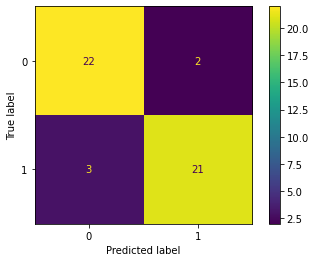

In [50]:

plot_confusion_matrix(lr, X_test, y_test)